# **D208 Predictive Modeling** | Performance Assessment Task 1 (file 1)
## **Churn Data Set**

### import libraries

In [305]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [306]:
from statsmodels.formula.api import ols

In [307]:
from statsmodels.api import qqplot 

In [308]:
from itertools import product

### upload and clean churn data set 

In [309]:
df= pd.read_csv('churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [310]:
#drop columns: customer IDs and demographics
df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Gender'], inplace=True)
df.head()

,Population,Job,Children,Age,Income,Marital,Churn,Outage_sec_perweek,Email,Contacts,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,38,Environmental health practitioner,0,68,28561.99,Widowed,No,7.978323,10,0,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,10446,"Programmer, multimedia",1,27,21704.77,Married,Yes,11.699080,12,0,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3735,Chief Financial Officer,4,50,9609.57,Widowed,No,10.752800,9,0,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,13863,Solicitor,1,48,18925.23,Married,No,14.913540,15,2,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,11352,Medical illustrator,0,83,40074.19,Separated,Yes,8.147417,16,2,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [311]:
#drop other columns

df.drop(columns=['Email', 'Contacts', 'Contract', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], inplace=True)
df.head()

,Population,Job,Children,Age,Income,Marital,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,...,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,Environmental health practitioner,0,68,28561.99,Widowed,No,7.978323,1,No,...,Fiber Optic,Yes,No,Yes,Yes,No,Yes,6.795513,172.455519,904.536110
1,10446,"Programmer, multimedia",1,27,21704.77,Married,Yes,11.699080,1,Yes,...,Fiber Optic,Yes,Yes,Yes,No,Yes,Yes,1.156681,242.632554,800.982766
2,3735,Chief Financial Officer,4,50,9609.57,Widowed,No,10.752800,1,Yes,...,DSL,Yes,Yes,No,No,No,Yes,15.754144,159.947583,2054.706961
3,13863,Solicitor,1,48,18925.23,Married,No,14.913540,0,Yes,...,DSL,Yes,No,Yes,No,Yes,No,17.087227,119.956840,2164.579412
4,11352,Medical illustrator,0,83,40074.19,Separated,Yes,8.147417,1,No,...,Fiber Optic,No,No,No,No,Yes,No,1.670972,149.948316,271.493436


### Preliminary Info on dataset

In [312]:
df.shape

(10000, 22)

In [313]:
df.dtypes

Population                int64
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Churn                    object
Outage_sec_perweek      float64
Yearly_equip_failure      int64
Techie                   object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
StreamingTV              object
StreamingMovies          object
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: object

In [314]:
df.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,6.000000,71.999280,290.160419,7158.981530


In [315]:
df.describe(include=object)

,Job,Marital,Churn,Techie,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies
count,10000,10000,10000,10000,10000,10000,7871,10000,10000,10000,10000,10000,10000
unique,639,5,2,2,2,2,2,2,2,2,2,2,2
top,Occupational psychologist,Divorced,No,No,No,No,Fiber Optic,Yes,No,No,No,No,No
freq,30,2092,7350,8321,5166,7009,4408,9067,5392,6424,5494,5071,5110


In [316]:
# drop "Job" variable - too many unique observations
df.drop(columns='Job', inplace=True)

In [317]:
df.head()

,Population,Children,Age,Income,Marital,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,...,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,Widowed,No,7.978323,1,No,Yes,...,Fiber Optic,Yes,No,Yes,Yes,No,Yes,6.795513,172.455519,904.536110
1,10446,1,27,21704.77,Married,Yes,11.699080,1,Yes,No,...,Fiber Optic,Yes,Yes,Yes,No,Yes,Yes,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,Widowed,No,10.752800,1,Yes,Yes,...,DSL,Yes,Yes,No,No,No,Yes,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,Married,No,14.913540,0,Yes,No,...,DSL,Yes,No,Yes,No,Yes,No,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,Separated,Yes,8.147417,1,No,Yes,...,Fiber Optic,No,No,No,No,Yes,No,1.670972,149.948316,271.493436


In [318]:
df.shape

(10000, 21)

In [319]:
df['Marital'].value_counts()  

Marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: count, dtype: int64

In [320]:
# drop "Marital" variable - too many unique observations
df.drop(columns='Marital', inplace=True)
df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,No,7.978323,1,No,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,Yes,6.795513,172.455519,904.536110
1,10446,1,27,21704.77,Yes,11.699080,1,Yes,No,Yes,Fiber Optic,Yes,Yes,Yes,No,Yes,Yes,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,No,10.752800,1,Yes,Yes,No,DSL,Yes,Yes,No,No,No,Yes,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,No,14.913540,0,Yes,No,No,DSL,Yes,No,Yes,No,Yes,No,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,Yes,8.147417,1,No,Yes,No,Fiber Optic,No,No,No,No,Yes,No,1.670972,149.948316,271.493436


In [321]:
df.shape

(10000, 20)

In [322]:
df.drop(columns='Children', inplace=True)
df.head()

,Population,Age,Income,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,68,28561.99,No,7.978323,1,No,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,Yes,6.795513,172.455519,904.536110
1,10446,27,21704.77,Yes,11.699080,1,Yes,No,Yes,Fiber Optic,Yes,Yes,Yes,No,Yes,Yes,1.156681,242.632554,800.982766
2,3735,50,9609.57,No,10.752800,1,Yes,Yes,No,DSL,Yes,Yes,No,No,No,Yes,15.754144,159.947583,2054.706961
3,13863,48,18925.23,No,14.913540,0,Yes,No,No,DSL,Yes,No,Yes,No,Yes,No,17.087227,119.956840,2164.579412
4,11352,83,40074.19,Yes,8.147417,1,No,Yes,No,Fiber Optic,No,No,No,No,Yes,No,1.670972,149.948316,271.493436


### Check for null values

In [323]:
df.isna().sum()

Population                 0
Age                        0
Income                     0
Churn                      0
Outage_sec_perweek         0
Yearly_equip_failure       0
Techie                     0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
StreamingTV                0
StreamingMovies            0
Tenure                     0
MonthlyCharge              0
Bandwidth_GB_Year          0
dtype: int64

#### no null values

### CHeck for duplicate rows

In [324]:
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

# Check for Outliers

### **POPULATION**

<Axes: xlabel='Population'>

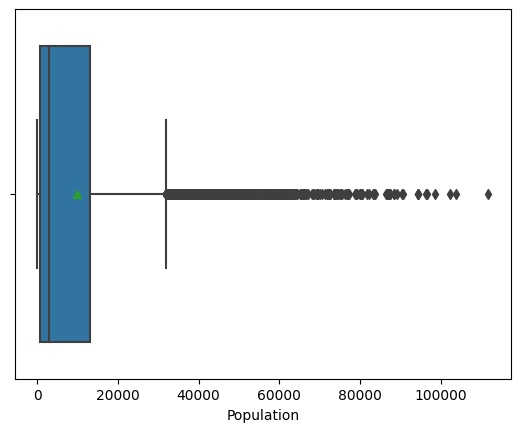

In [325]:
sns.boxplot(x='Population', data=df, showmeans=True)

In [326]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [327]:
outliers = find_outliers_IQR(df['Population'])
print("number of outliers: " + str(len(outliers)))
print('max outlier value: ' + str(outliers.max()))
print('min outlier value: ' + str(outliers.min()))

number of outliers: 937
max outlier value: 111850
min outlier value: 31816


<Axes: xlabel='Population', ylabel='Count'>

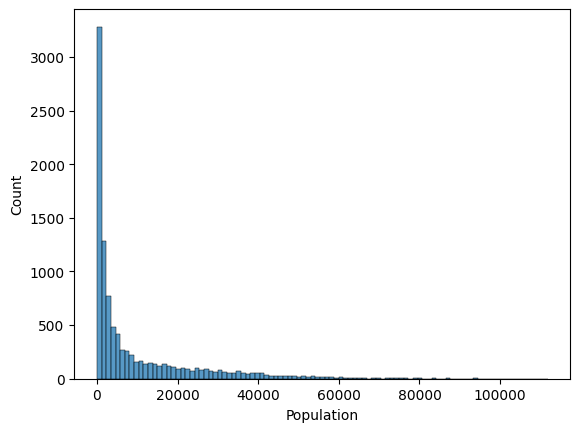

In [328]:
sns.histplot(x='Population', data=df)

### **AGE**

<Axes: xlabel='Age'>

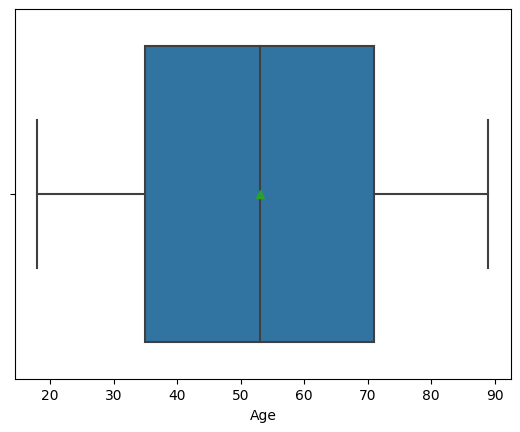

In [329]:
sns.boxplot(x='Age', data=df, showmeans=True)

no outliers in age

### **INCOME**

<Axes: xlabel='Income'>

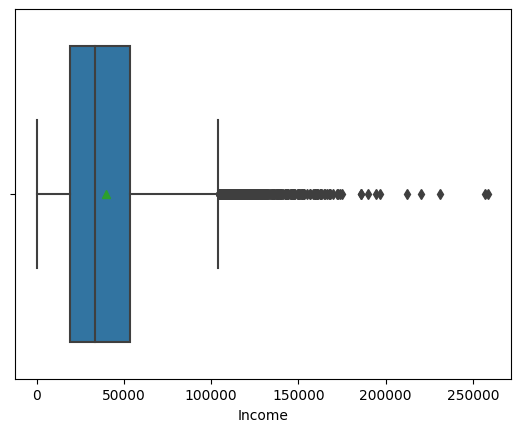

In [330]:
sns.boxplot(x='Income', data=df, showmeans=True)

In [331]:
outliers = find_outliers_IQR(df['Income'])
print("number of outliers: " + str(len(outliers)))
print('max outlier value: ' + str(outliers.max()))
print('min outlier value: ' + str(outliers.min()))

number of outliers: 336
max outlier value: 258900.7
min outlier value: 104362.5


### **OUTAGE_SEC_PERWEEK**

<Axes: xlabel='Outage_sec_perweek'>

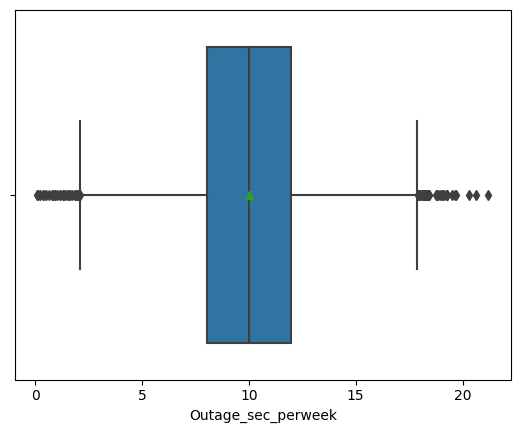

In [332]:
sns.boxplot(x='Outage_sec_perweek', data=df, showmeans=True)

In [333]:
outliers = find_outliers_IQR(df['Outage_sec_perweek'])
print("number of outliers: " + str(len(outliers)))
print('max outlier value: ' + str(outliers.max()))
print('min outlier value: ' + str(outliers.min()))

number of outliers: 76
max outlier value: 21.20723
min outlier value: 0.09974694


### **YEARLY_EQUIP_FAILURE**

<Axes: xlabel='Yearly_equip_failure'>

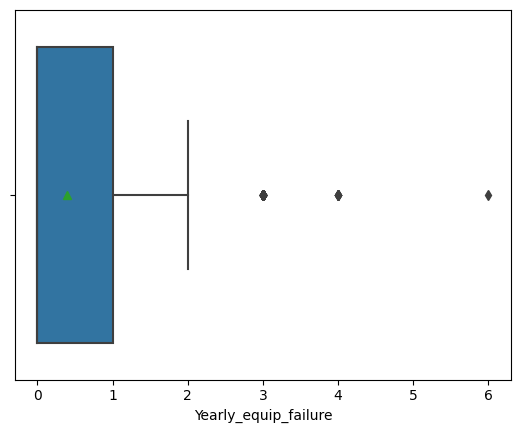

In [334]:
sns.boxplot(x='Yearly_equip_failure', data=df, showmeans=True)

In [335]:
outliers = find_outliers_IQR(df['Yearly_equip_failure'])
print("number of outliers: " + str(len(outliers)))
print('max outlier value: ' + str(outliers.max()))
print('min outlier value: ' + str(outliers.min()))

number of outliers: 94
max outlier value: 6
min outlier value: 3


### **MONTHLYCHARGE**

<Axes: xlabel='MonthlyCharge'>

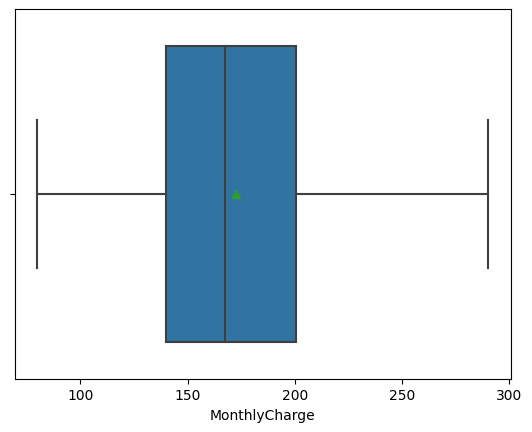

In [336]:
sns.boxplot(x='MonthlyCharge', data=df, showmeans=True)

### **TENURE**

<Axes: xlabel='Tenure'>

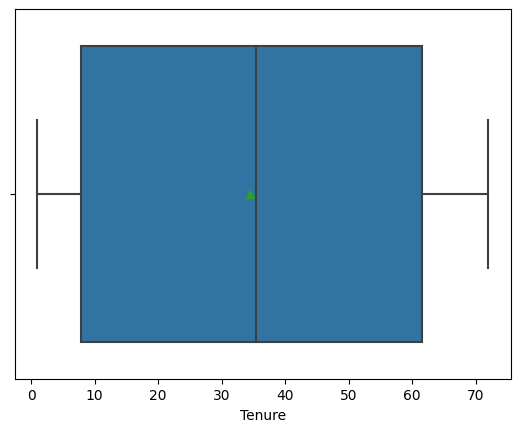

In [337]:
sns.boxplot(x='Tenure', data=df, showmeans=True)

# **OUTLIERS**
- variables with outliers: Population, Income, Outage_sec_perweek, Yearly_equip_failture
- if we remove all the rows with outliers in 'Population', about 10% of the data will be removed
- will plot scatterplots against the target variable to see about outlier influence

<Axes: xlabel='Population', ylabel='Bandwidth_GB_Year'>

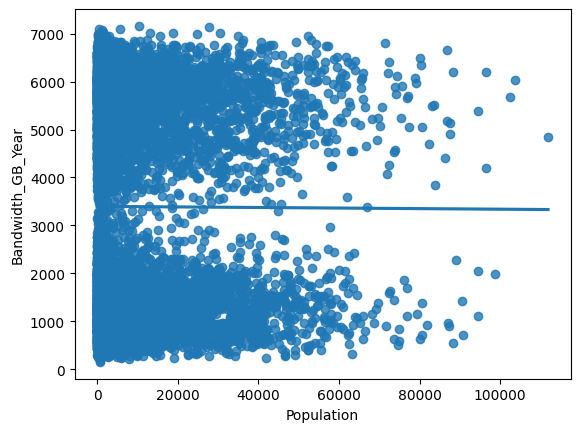

In [338]:
sns.regplot(x='Population', y='Bandwidth_GB_Year', data=df, ci=None)

<Axes: xlabel='Income', ylabel='Bandwidth_GB_Year'>

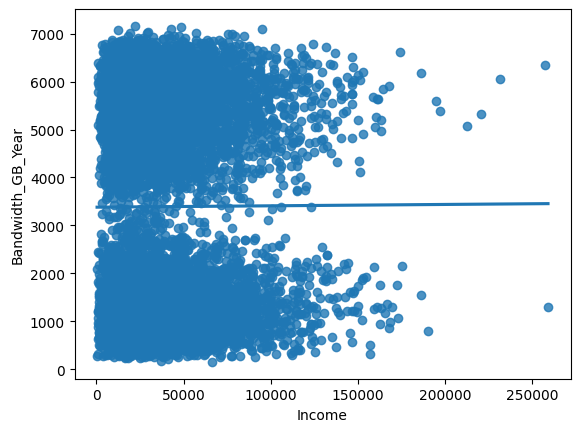

In [339]:
sns.regplot(x='Income', y='Bandwidth_GB_Year', data=df, ci=None)

<Axes: xlabel='Outage_sec_perweek', ylabel='Bandwidth_GB_Year'>

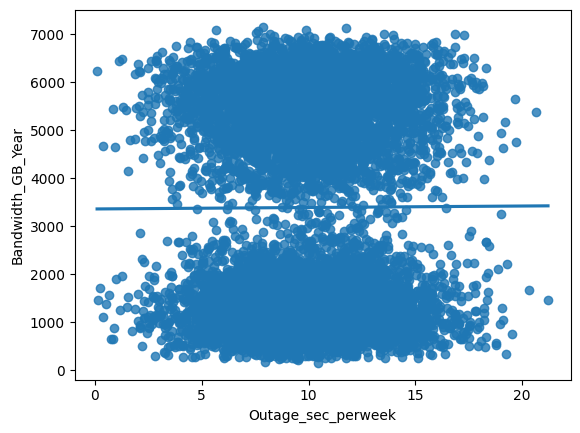

In [340]:
sns.regplot(x='Outage_sec_perweek', y='Bandwidth_GB_Year', data=df, ci=None)

<Axes: xlabel='Yearly_equip_failure', ylabel='Bandwidth_GB_Year'>

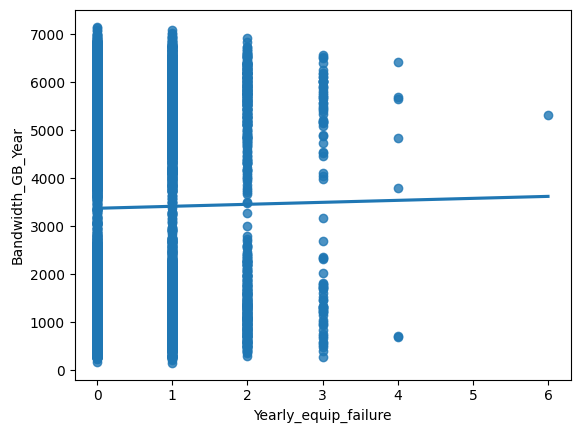

In [341]:
sns.regplot(x='Yearly_equip_failure', y='Bandwidth_GB_Year', data=df, ci=None)

- will drop data with 6 'yearly_equip_failures
- will not drop any 'outage_sec_perweek' data
- will drop income > 200,000
- will drop population > 100,000

In [342]:
df.drop(df[df['Yearly_equip_failure'] == 6].index, inplace=True)

In [343]:
df.shape

(9999, 19)

In [344]:
df['Yearly_equip_failure'].describe()

count    9999.000000
mean        0.397440
std         0.633512
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: Yearly_equip_failure, dtype: float64

In [345]:
df.drop(df[df['Income'] > 200000].index, inplace=True)

In [346]:
df.shape

(9994, 19)

In [347]:
df['Income'].describe()

count      9994.000000
mean      39710.411833
std       27861.200412
min         348.670000
25%       19219.835000
50%       33156.205000
75%       53226.895000
max      196746.000000
Name: Income, dtype: float64

In [348]:
df.drop(df[df['Population'] > 100000].index, inplace=True)

In [349]:
df.shape

(9991, 19)

In [350]:
df['Population'].describe()

count     9991.000000
mean      9730.486037
std      14341.542493
min          0.000000
25%        737.500000
50%       2905.000000
75%      13161.000000
max      98660.000000
Name: Population, dtype: float64

# **RE-EXPRESS CATEGORICAL DATA**

In [351]:
df.dtypes

Population                int64
Age                       int64
Income                  float64
Churn                    object
Outage_sec_perweek      float64
Yearly_equip_failure      int64
Techie                   object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
StreamingTV              object
StreamingMovies          object
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: object

## **ORDINAL ENCODING**
- encode all yes/no responses to Yes = 1 and No = 0
- variables: Churn, Techie, Port_modem, Tablet, Phone, Multiple, OnlineSecurity, OnlineBackup, StreamingTV, StreamingMovies

In [352]:
df['Churn'].replace({'No' : 0, 'Yes' : 1}, inplace=True)

In [353]:
df['Churn'].value_counts()

Churn
0    7341
1    2650
Name: count, dtype: int64

In [354]:
df['Techie'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['Port_modem'].replace({'No' : 0, 'Yes' : 1}, inplace=True)

In [355]:
df['Tablet'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['Phone'].replace({'No' : 0, 'Yes' : 1}, inplace=True)

In [356]:
df['Multiple'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['OnlineSecurity'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['OnlineBackup'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['StreamingTV'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['StreamingMovies'].replace({'No' : 0, 'Yes' : 1}, inplace=True)

In [357]:
df['StreamingMovies'].value_counts()

StreamingMovies
0    5104
1    4887
Name: count, dtype: int64

In [358]:
df.dtypes

Population                int64
Age                       int64
Income                  float64
Churn                     int64
Outage_sec_perweek      float64
Yearly_equip_failure      int64
Techie                    int64
Port_modem                int64
Tablet                    int64
InternetService          object
Phone                     int64
Multiple                  int64
OnlineSecurity            int64
OnlineBackup              int64
StreamingTV               int64
StreamingMovies           int64
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: object

## **ONE HOT ENCODER**
- nomial data type: "InternetService"

In [359]:
df['InternetService'].unique()

array(['Fiber Optic', 'DSL', nan], dtype=object)

In [360]:
df = pd.get_dummies(df, columns=['InternetService'])

In [361]:
df.head()

,Population,Age,Income,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_Fiber Optic
0,38,68,28561.99,0,7.978323,1,0,1,1,1,0,1,1,0,1,6.795513,172.455519,904.536110,False,True
1,10446,27,21704.77,1,11.699080,1,1,0,1,1,1,1,0,1,1,1.156681,242.632554,800.982766,False,True
2,3735,50,9609.57,0,10.752800,1,1,1,0,1,1,0,0,0,1,15.754144,159.947583,2054.706961,True,False
3,13863,48,18925.23,0,14.913540,0,1,0,0,1,0,1,0,1,0,17.087227,119.956840,2164.579412,True,False
4,11352,83,40074.19,1,8.147417,1,0,1,0,0,0,0,0,1,0,1.670972,149.948316,271.493436,False,True


# **DESCRIPTIVE STATISTICS**

In [362]:
df.describe()

,Population,Age,Income,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000
mean,9730.486037,53.082174,39715.501730,0.265239,10.002278,0.397157,0.167851,0.483735,0.298769,0.906616,0.460815,0.357622,0.450606,0.492743,0.489140,34.508248,172.618895,3390.795380
std,14341.542493,20.702085,27863.826217,0.441482,2.976494,0.633253,0.373753,0.499760,0.457741,0.290984,0.498487,0.479324,0.497579,0.499972,0.499907,26.442933,42.937793,2185.252241
min,0.000000,18.000000,348.670000,0.000000,0.099747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,737.500000,35.000000,19214.740000,0.000000,8.019310,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.916107,139.979239,1236.046551
50%,2905.000000,53.000000,33168.880000,0.000000,10.019720,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.196120,167.484700,3260.745232
75%,13161.000000,71.000000,53227.795000,1.000000,11.971418,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,61.473295,200.165200,5584.704954
max,98660.000000,89.000000,196746.000000,1.000000,21.207230,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.999280,290.160419,7158.981530


In [363]:
df['Bandwidth_GB_Year'].describe()

count    9991.000000
mean     3390.795380
std      2185.252241
min       155.506715
25%      1236.046551
50%      3260.745232
75%      5584.704954
max      7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [364]:
df['Population'].describe()

count     9991.000000
mean      9730.486037
std      14341.542493
min          0.000000
25%        737.500000
50%       2905.000000
75%      13161.000000
max      98660.000000
Name: Population, dtype: float64

In [365]:
df['Age'].describe()

count    9991.000000
mean       53.082174
std        20.702085
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

In [366]:
df['Income'].describe()

count      9991.000000
mean      39715.501730
std       27863.826217
min         348.670000
25%       19214.740000
50%       33168.880000
75%       53227.795000
max      196746.000000
Name: Income, dtype: float64

In [367]:
df['Outage_sec_perweek'].describe()

count    9991.000000
mean       10.002278
std         2.976494
min         0.099747
25%         8.019310
50%        10.019720
75%        11.971418
max        21.207230
Name: Outage_sec_perweek, dtype: float64

In [368]:
df['Yearly_equip_failure'].describe()

count    9991.000000
mean        0.397157
std         0.633253
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: Yearly_equip_failure, dtype: float64

In [369]:
df['Tenure'].describe()

count    9991.000000
mean       34.508248
std        26.442933
min         1.000259
25%         7.916107
50%        33.196120
75%        61.473295
max        71.999280
Name: Tenure, dtype: float64

In [370]:
df['MonthlyCharge'].describe()

count    9991.000000
mean      172.618895
std        42.937793
min        79.978860
25%       139.979239
50%       167.484700
75%       200.165200
max       290.160419
Name: MonthlyCharge, dtype: float64

In [371]:
df['Churn'].value_counts()

Churn
0    7341
1    2650
Name: count, dtype: int64

In [372]:
df['Techie'].value_counts()

Techie
0    8314
1    1677
Name: count, dtype: int64

In [373]:
df['Port_modem'].value_counts()

Port_modem
0    5158
1    4833
Name: count, dtype: int64

In [374]:
df['Tablet'].value_counts()

Tablet
0    7006
1    2985
Name: count, dtype: int64

In [375]:
df['Phone'].value_counts()

Phone
1    9058
0     933
Name: count, dtype: int64

In [376]:
df['Multiple'].value_counts()

Multiple
0    5387
1    4604
Name: count, dtype: int64

In [377]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
0    6418
1    3573
Name: count, dtype: int64

In [378]:
df['OnlineBackup'].value_counts()

OnlineBackup
0    5489
1    4502
Name: count, dtype: int64

In [379]:
df['StreamingTV'].value_counts()

StreamingTV
0    5068
1    4923
Name: count, dtype: int64

In [380]:
df['StreamingMovies'].value_counts()

StreamingMovies
0    5104
1    4887
Name: count, dtype: int64

In [381]:
df['InternetService_Fiber Optic'].value_counts()

InternetService_Fiber Optic
False    5587
True     4404
Name: count, dtype: int64

In [382]:
df['InternetService_DSL'].value_counts()

InternetService_DSL
False    6532
True     3459
Name: count, dtype: int64

In [383]:
df[['InternetService_Fiber Optic', 'InternetService_DSL']].dtypes

InternetService_Fiber Optic    bool
InternetService_DSL            bool
dtype: object

In [384]:
internet = df[['InternetService_Fiber Optic', 'InternetService_DSL']]
internet.head()

,InternetService_Fiber Optic,InternetService_DSL
0,True,False
1,True,False
2,False,True
3,False,True
4,True,False


In [385]:
internet.describe()

,InternetService_Fiber Optic,InternetService_DSL
count,9991,9991
unique,2,2
top,False,False
freq,5587,6532


In [388]:
internet.dtypes

InternetService_Fiber Optic    bool
InternetService_DSL            bool
dtype: object

In [387]:
internet.astype('category')

,InternetService_Fiber Optic,InternetService_DSL
0,True,False
1,True,False
2,False,True
3,False,True
4,True,False
...,...,...
9995,False,True
9996,True,False
9997,True,False
9998,True,False


In [391]:
df[['InternetService_Fiber Optic', 'InternetService_DSL']].dtypes

InternetService_Fiber Optic    bool
InternetService_DSL            bool
dtype: object

In [402]:
df['InternetService_Fiber Optic'].dtypes

dtype('int64')

In [403]:
df['InternetService_DSL'].dtypes

dtype('int64')

In [398]:
df['InternetService_DSL'].replace({
    False : 0, 
    True : 1
}, inplace=True)

In [399]:
df['InternetService_DSL']

0       0
1       0
2       1
3       1
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: InternetService_DSL, Length: 9991, dtype: int64

In [400]:
df['InternetService_Fiber Optic'].replace({
    False : 0, 
    True : 1
}, inplace=True)

In [401]:
df['InternetService_Fiber Optic']

0       1
1       1
2       0
3       0
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    1
Name: InternetService_Fiber Optic, Length: 9991, dtype: int64

In [410]:
df.head()

,Population,Age,Income,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_Fiber Optic
0,38,68,28561.99,0,7.978323,1,0,1,1,1,0,1,1,0,1,6.795513,172.455519,904.536110,0,1
1,10446,27,21704.77,1,11.699080,1,1,0,1,1,1,1,0,1,1,1.156681,242.632554,800.982766,0,1
2,3735,50,9609.57,0,10.752800,1,1,1,0,1,1,0,0,0,1,15.754144,159.947583,2054.706961,1,0
3,13863,48,18925.23,0,14.913540,0,1,0,0,1,0,1,0,1,0,17.087227,119.956840,2164.579412,1,0
4,11352,83,40074.19,1,8.147417,1,0,1,0,0,0,0,0,1,0,1.670972,149.948316,271.493436,0,1


In [414]:
df.to_csv('prepared_dataset_churn_D208.csv', index=False)

In [415]:
df['InternetService_Fiber Optic'].value_counts()

InternetService_Fiber Optic
0    5587
1    4404
Name: count, dtype: int64

In [416]:
df['InternetService_DSL'].value_counts()

InternetService_DSL
0    6532
1    3459
Name: count, dtype: int64

# **VISUALIZATIONS**

<Axes: xlabel='Bandwidth_GB_Year'>

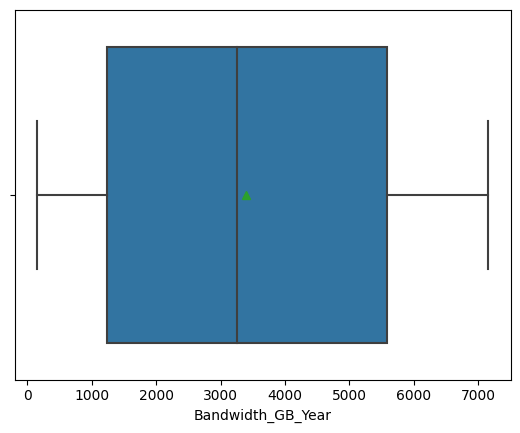

In [418]:
sns.boxplot(x='Bandwidth_GB_Year', data=df, showmeans=True)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Count'>

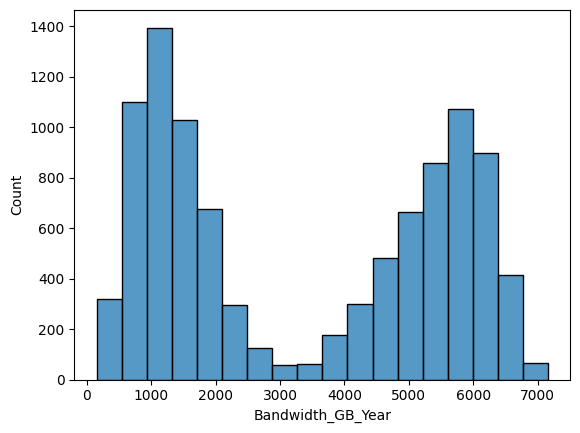

In [420]:
sns.histplot(x='Bandwidth_GB_Year', data=df)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Bandwidth_GB_Year'>

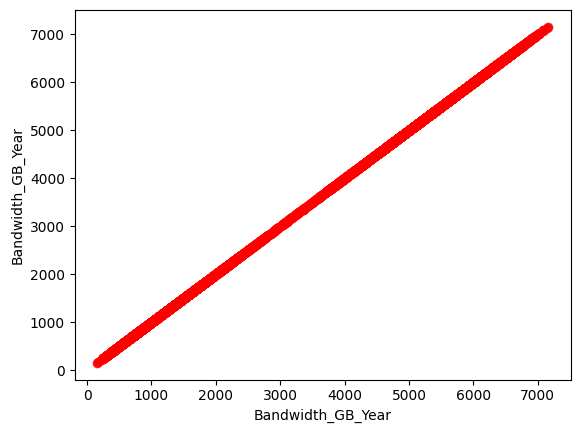

In [429]:
sns.regplot(x='Bandwidth_GB_Year', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='Population', ylabel='Count'>

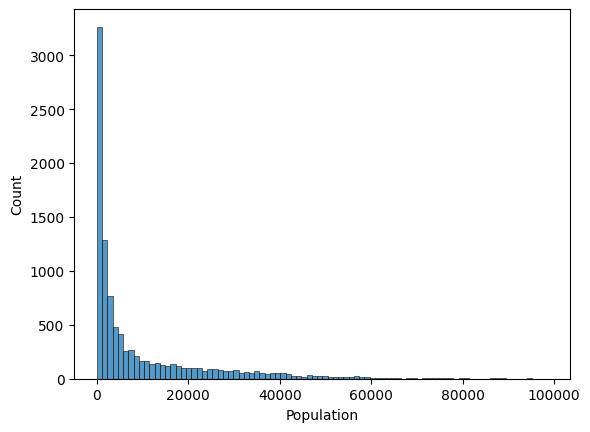

In [424]:
sns.histplot(x='Population', data=df)

<Axes: xlabel='Population', ylabel='Bandwidth_GB_Year'>

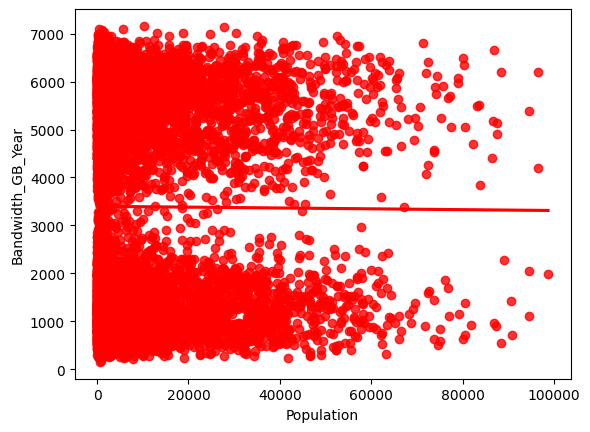

In [430]:
sns.regplot(x='Population', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='Age', ylabel='Count'>

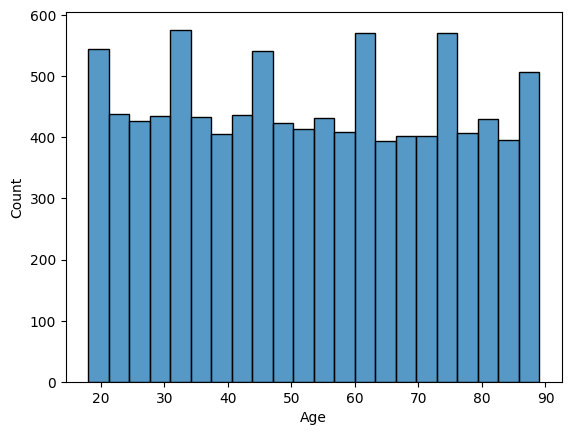

In [428]:
sns.histplot(x='Age', data=df)

<Axes: xlabel='Age', ylabel='Bandwidth_GB_Year'>

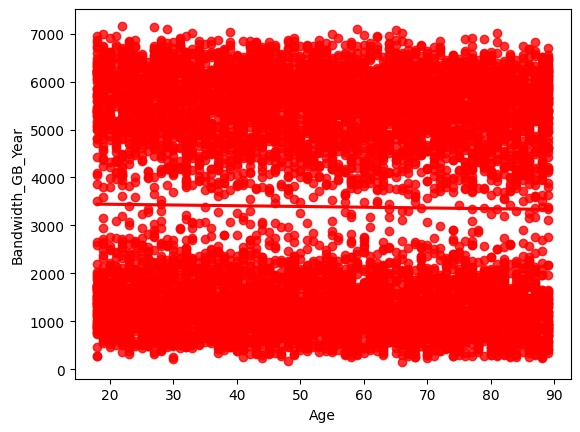

In [431]:
sns.regplot(x='Age', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='Income', ylabel='Count'>

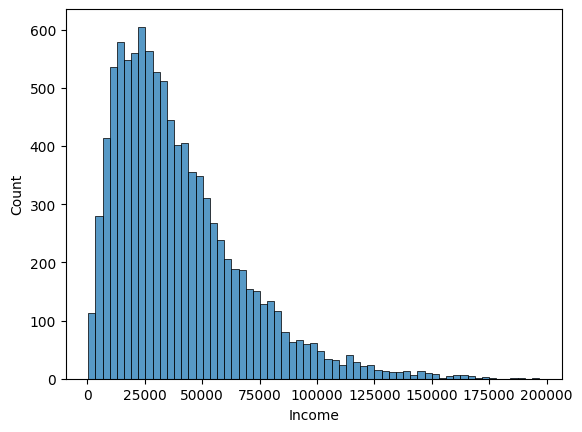

In [432]:
sns.histplot(x='Income', data=df)

<Axes: xlabel='Income', ylabel='Bandwidth_GB_Year'>

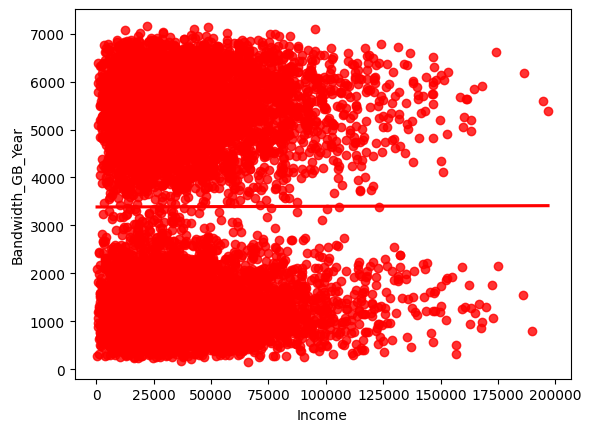

In [433]:
sns.regplot(x='Income', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='Outage_sec_perweek', ylabel='Count'>

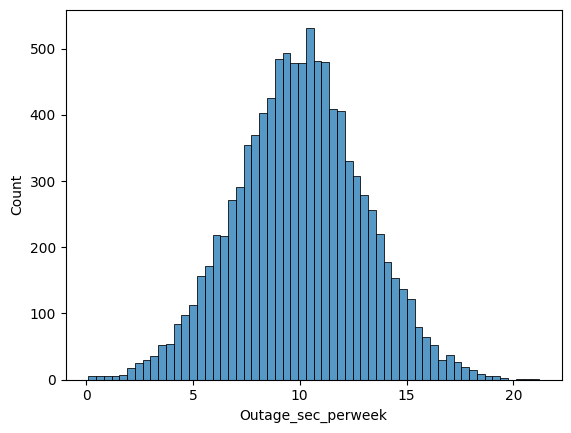

In [434]:
sns.histplot(x='Outage_sec_perweek', data=df)

<Axes: xlabel='Outage_sec_perweek', ylabel='Bandwidth_GB_Year'>

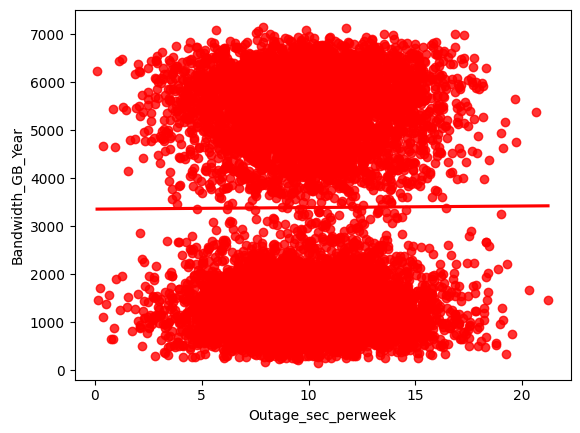

In [435]:
sns.regplot(x='Outage_sec_perweek', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='Yearly_equip_failure', ylabel='Count'>

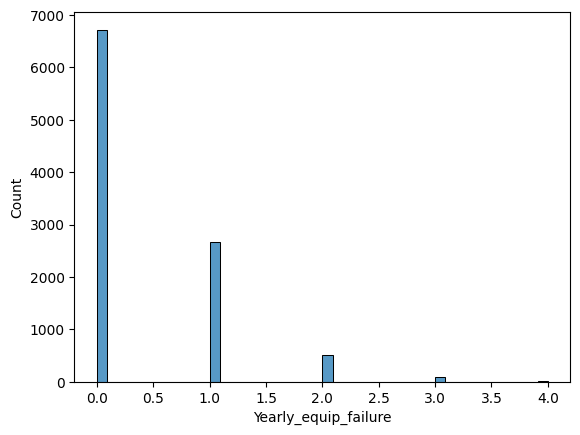

In [436]:
sns.histplot(x='Yearly_equip_failure', data=df)

<Axes: xlabel='Yearly_equip_failure', ylabel='Bandwidth_GB_Year'>

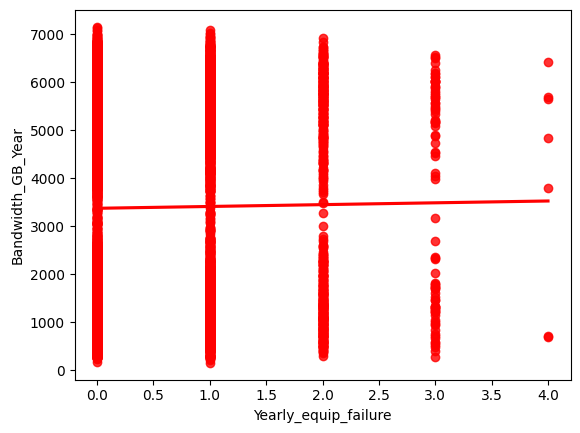

In [437]:
sns.regplot(x='Yearly_equip_failure', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='Tenure', ylabel='Count'>

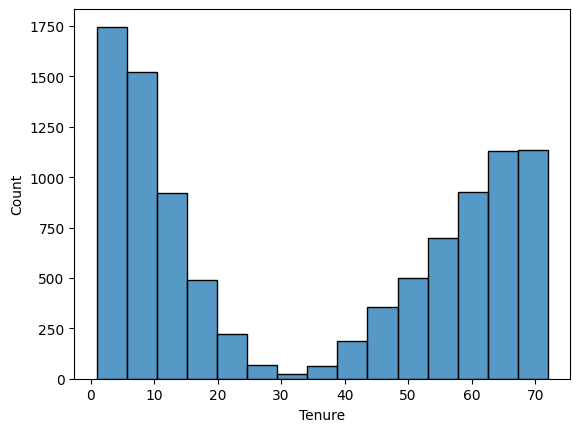

In [438]:
sns.histplot(x='Tenure', data=df)

<Axes: xlabel='Tenure', ylabel='Bandwidth_GB_Year'>

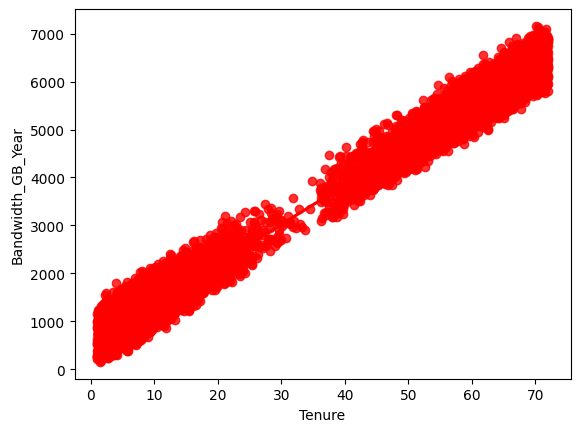

In [439]:
sns.regplot(x='Tenure', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='MonthlyCharge', ylabel='Count'>

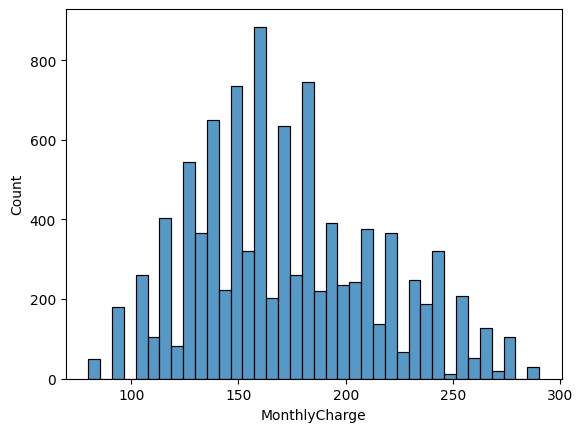

In [440]:
sns.histplot(x='MonthlyCharge', data=df)

<Axes: xlabel='MonthlyCharge', ylabel='Bandwidth_GB_Year'>

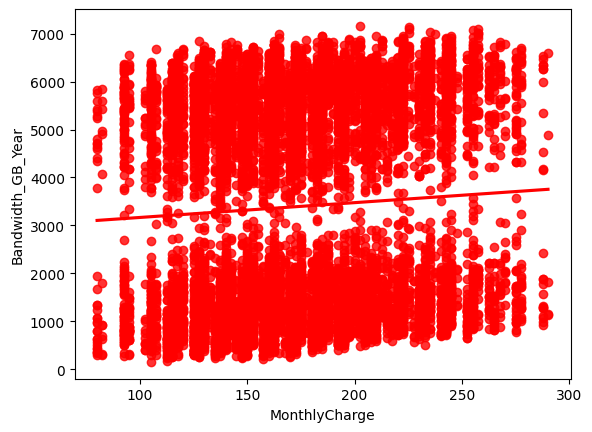

In [441]:
sns.regplot(x='MonthlyCharge', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='Churn', ylabel='count'>

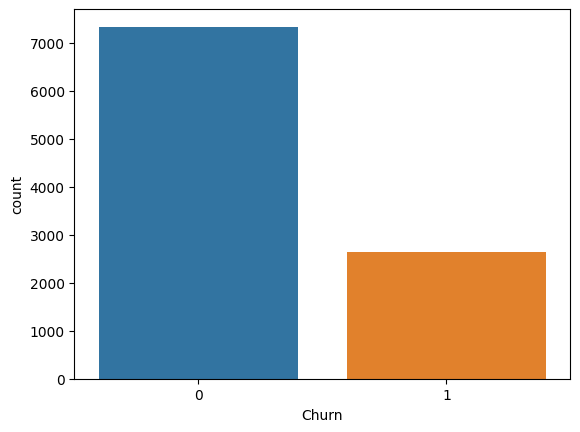

In [442]:
sns.countplot(x='Churn', data=df)

<Axes: xlabel='Churn', ylabel='Bandwidth_GB_Year'>

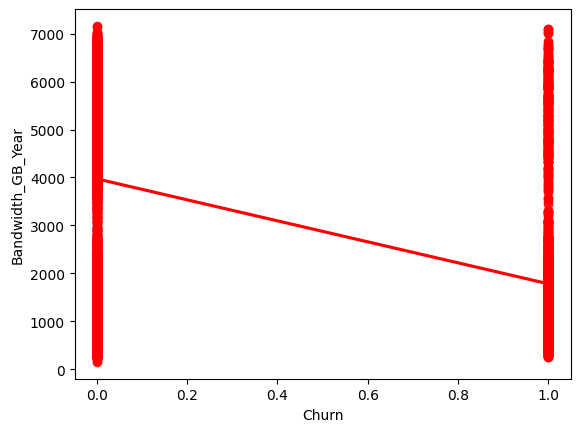

In [447]:
sns.regplot(x='Churn', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='Techie', ylabel='count'>

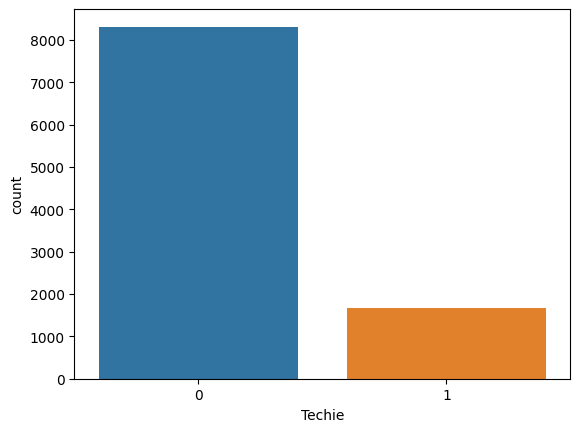

In [448]:
sns.countplot(x='Techie', data=df)

<Axes: xlabel='Techie', ylabel='Bandwidth_GB_Year'>

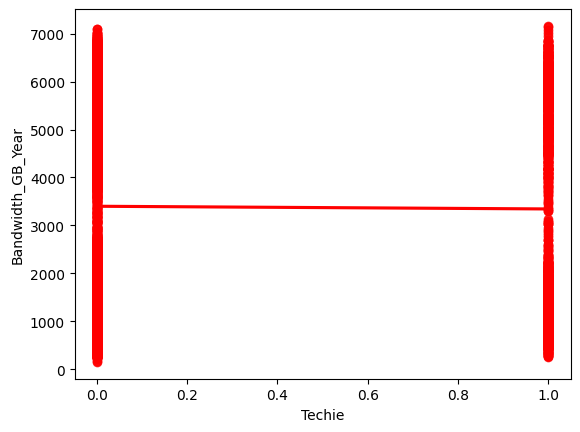

In [449]:
sns.regplot(x='Techie', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='Port_modem', ylabel='count'>

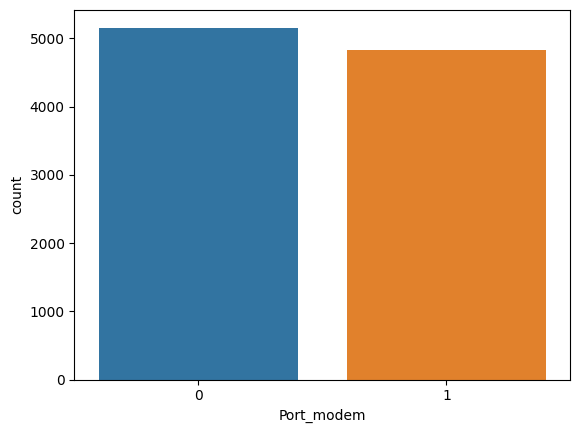

In [450]:
sns.countplot(x='Port_modem', data=df)

<Axes: xlabel='Port_modem', ylabel='Bandwidth_GB_Year'>

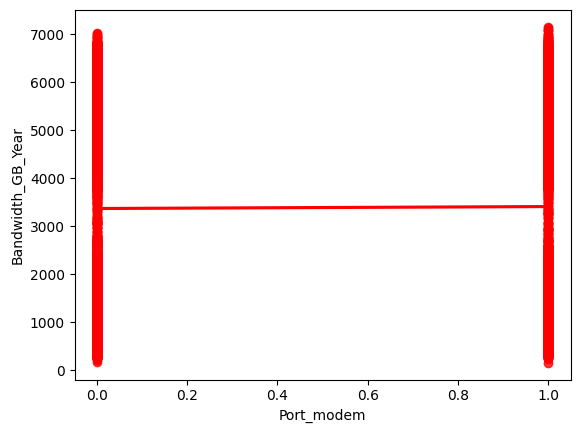

In [452]:
sns.regplot(x='Port_modem', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='Tablet', ylabel='count'>

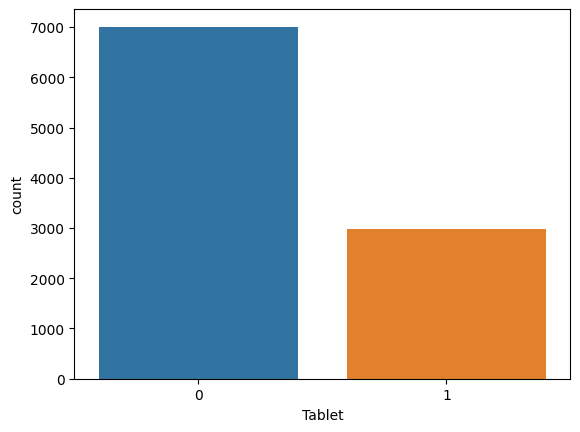

In [453]:
sns.countplot(x='Tablet', data=df)

<Axes: xlabel='Tablet', ylabel='Bandwidth_GB_Year'>

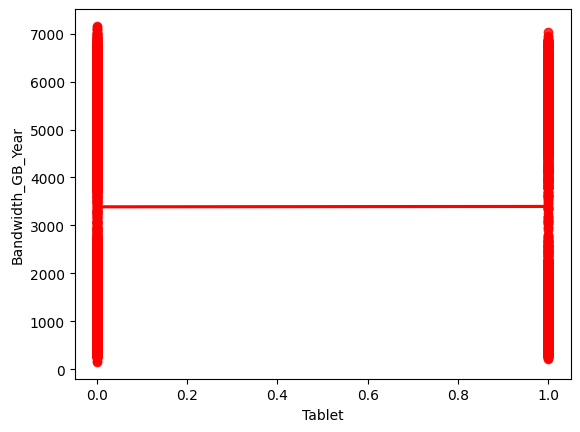

In [454]:
sns.regplot(x='Tablet', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='InternetService_DSL', ylabel='count'>

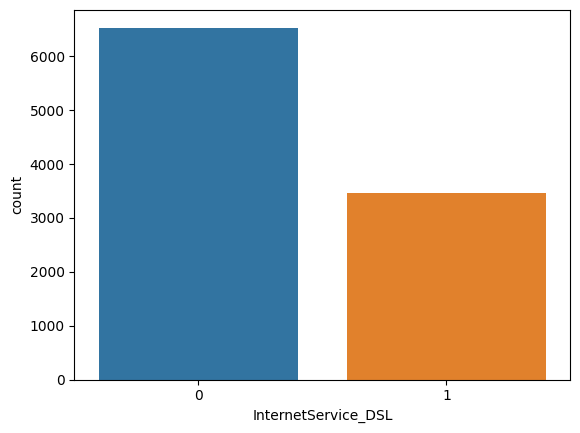

In [455]:
sns.countplot(x='InternetService_DSL', data=df)

<Axes: xlabel='InternetService_Fiber Optic', ylabel='count'>

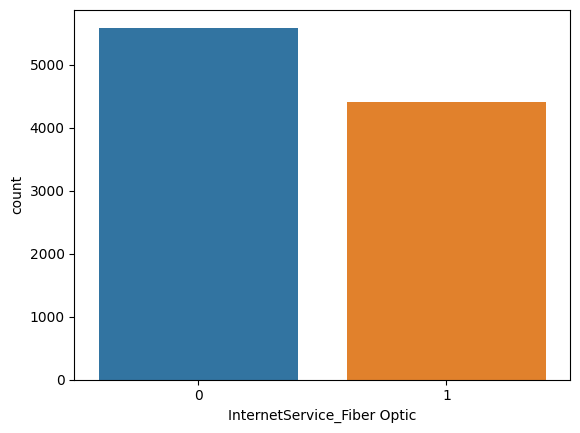

In [456]:
sns.countplot(x='InternetService_Fiber Optic', data=df)

<Axes: xlabel='InternetService_DSL', ylabel='Bandwidth_GB_Year'>

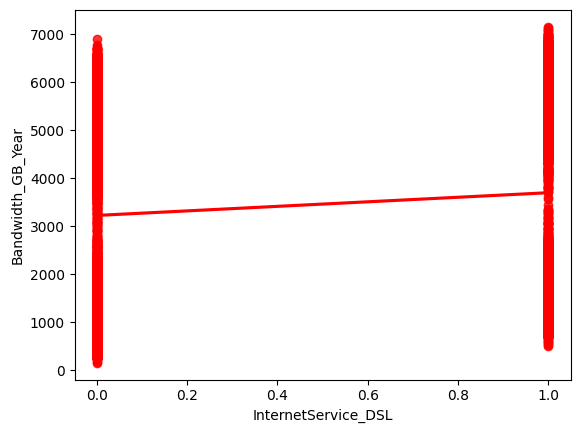

In [457]:
sns.regplot(x='InternetService_DSL', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='InternetService_Fiber Optic', ylabel='Bandwidth_GB_Year'>

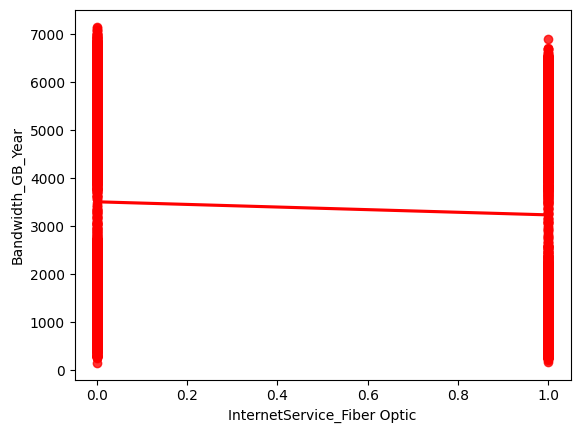

In [458]:
sns.regplot(x='InternetService_Fiber Optic', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='Phone', ylabel='count'>

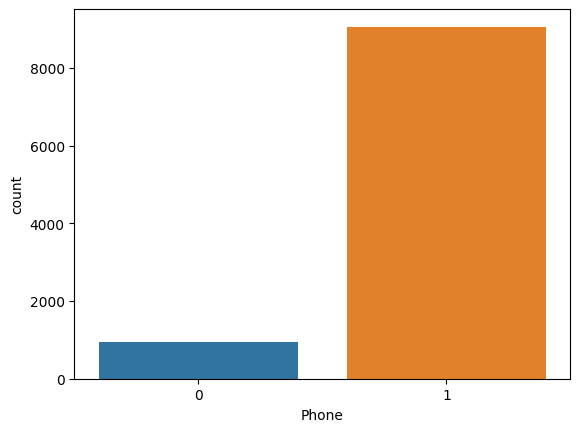

In [459]:
sns.countplot(x='Phone', data=df)

<Axes: xlabel='Phone', ylabel='Bandwidth_GB_Year'>

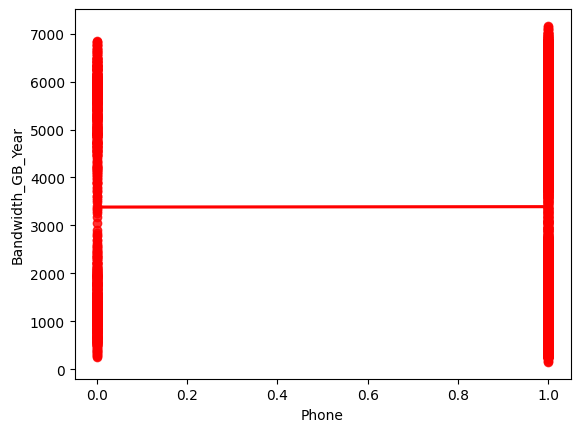

In [460]:
sns.regplot(x='Phone', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='Multiple', ylabel='count'>

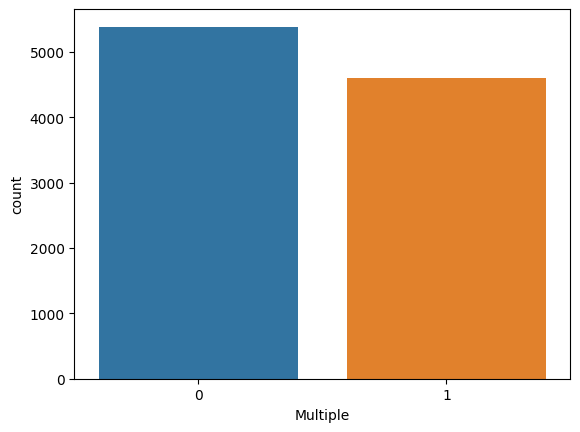

In [461]:
sns.countplot(x='Multiple', data=df)

<Axes: xlabel='Multiple', ylabel='Bandwidth_GB_Year'>

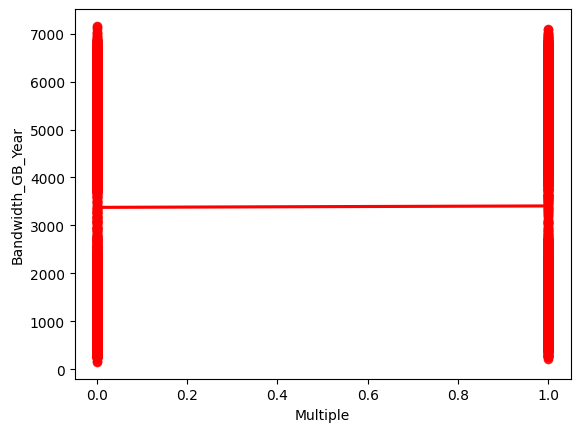

In [462]:
sns.regplot(x='Multiple', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='OnlineSecurity', ylabel='count'>

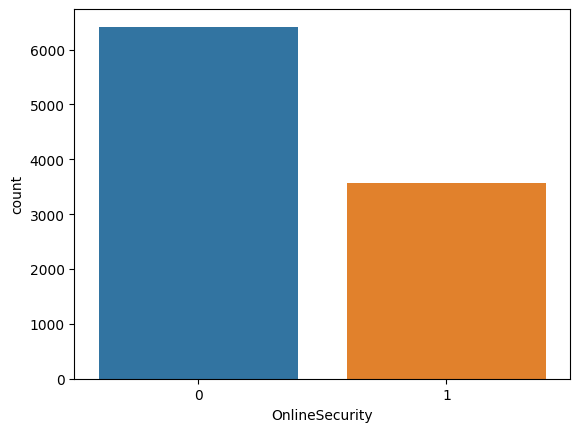

In [463]:
sns.countplot(x='OnlineSecurity', data=df)

<Axes: xlabel='OnlineSecurity', ylabel='Bandwidth_GB_Year'>

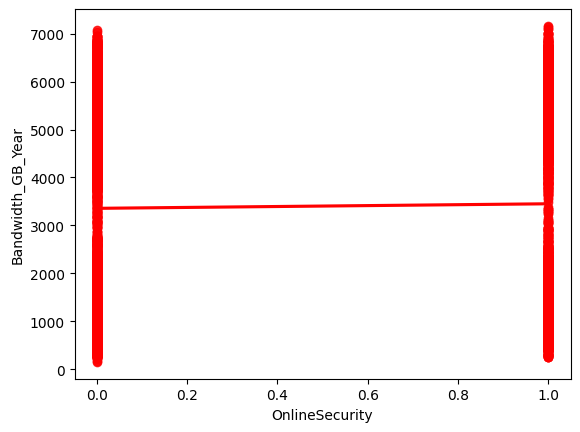

In [464]:
sns.regplot(x='OnlineSecurity', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='OnlineBackup', ylabel='count'>

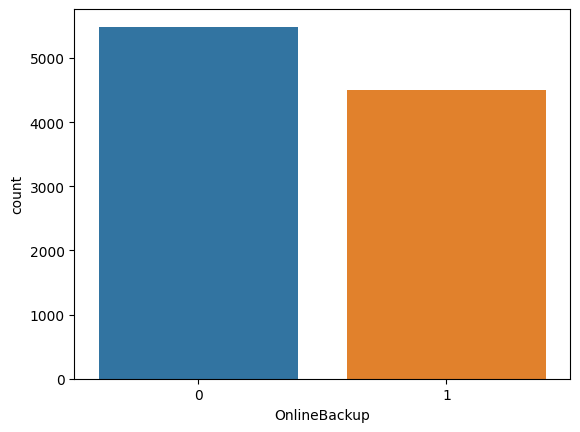

In [465]:
sns.countplot(x='OnlineBackup', data=df)

<Axes: xlabel='OnlineBackup', ylabel='Bandwidth_GB_Year'>

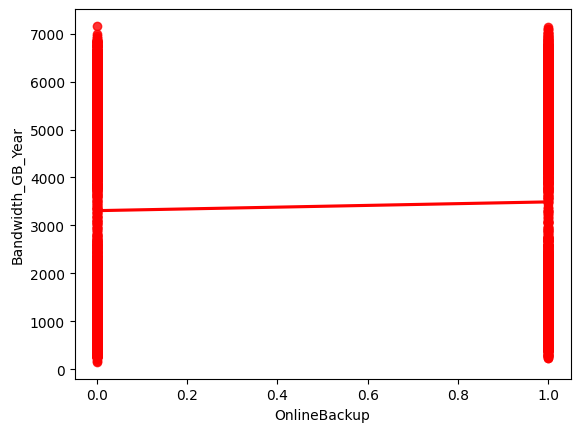

In [466]:
sns.regplot(x='OnlineBackup', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='StreamingTV', ylabel='count'>

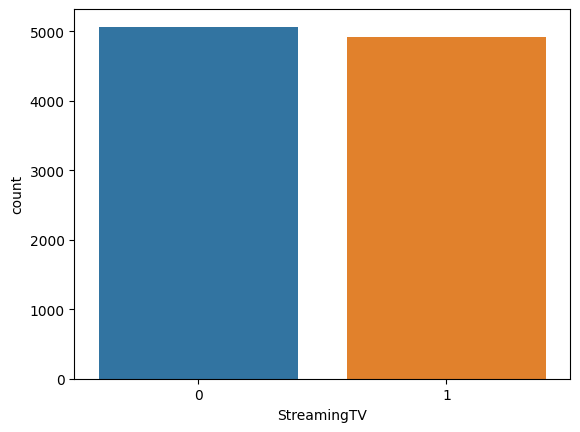

In [467]:
sns.countplot(x='StreamingTV', data=df)

<Axes: xlabel='StreamingTV', ylabel='Bandwidth_GB_Year'>

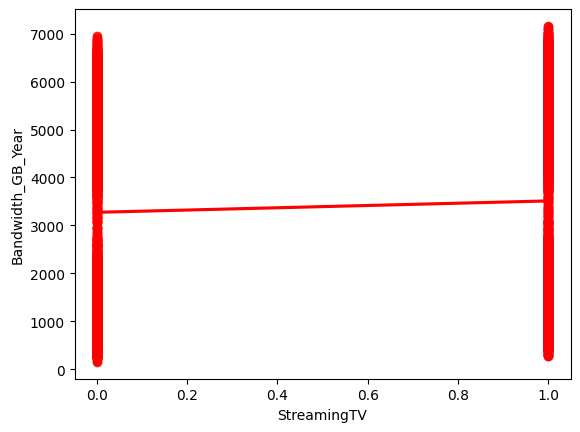

In [468]:
sns.regplot(x='StreamingTV', y='Bandwidth_GB_Year', data=df, color='red', ci=None)

<Axes: xlabel='StreamingMovies', ylabel='count'>

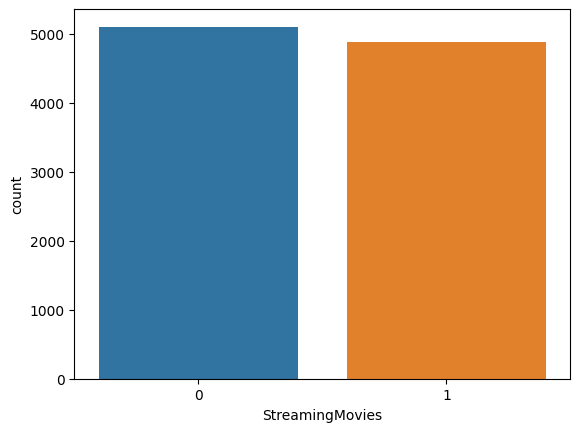

In [469]:
sns.countplot(x='StreamingMovies', data=df)

<Axes: xlabel='StreamingMovies', ylabel='Bandwidth_GB_Year'>

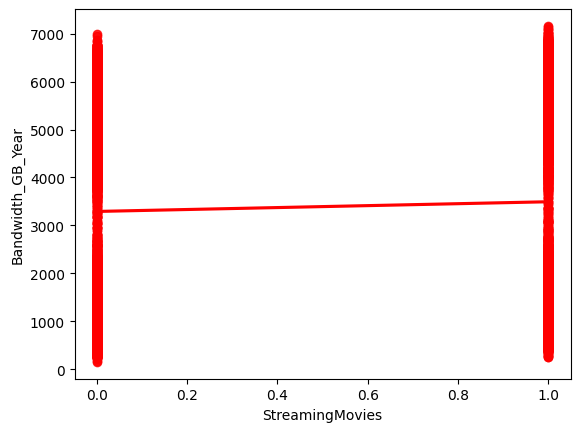

In [470]:
sns.regplot(x='StreamingMovies', y='Bandwidth_GB_Year', data=df, color='red', ci=None)